## 6.2: Exploring Relatinships

### This script contains the following:

#### 1. Importing  Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Revisit the questions
#### 4. Hypothesis

## 1.Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.8.4'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Define path

path = '/home/ergo/Desktop/Femina/Analyzing Flight Delays'

In [11]:
# Import Data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','flightdelay_cleaned.csv'))

In [12]:
df.columns

Index(['Unnamed: 0', 'Flight_Date', 'Airline', 'Airline_DOT_Code',
       'Airline_Code', 'Flight_Number', 'Origin_Airport', 'Origin_City',
       'Destination_Airport', 'Destination_City', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay', 'Scheduled_Arrival_Time',
       'Actual_Arrival_Time', 'Arrival_Delay', 'Cancelled',
       'Cancellation_Code', 'Diverted', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'],
      dtype='object')

## 2. Exploring relationship

### Correlations

In [13]:
# Select relevant numeric columns for correlation matrix

numeric_columns = [
    'Departure_Delay', 'Arrival_Delay', 'Scheduled_Elapsed_Time',
    'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
    'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'
]

# Filter the dataset to include only these columns
df_numeric = df[numeric_columns]

In [14]:
# Create a correlation matrix using pandas

df_numeric.corr()

,Departure_Delay,Arrival_Delay,Scheduled_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
Departure_Delay,1.000000,0.962142,0.024331,0.028504,0.020717,0.022114,0.703973,0.295888,0.274383,0.036006,0.603597
Arrival_Delay,0.962142,1.000000,-0.002546,0.051441,0.017271,0.001746,0.684813,0.296652,0.360215,0.035741,0.588849
Scheduled_Elapsed_Time,0.024331,-0.002546,1.000000,0.980831,0.987609,0.982564,0.012972,-0.006011,0.025858,0.002287,-0.000381
Actual_Elapsed_Time,0.028504,0.051441,0.980831,1.000000,0.987745,0.968046,0.019040,0.002847,0.094914,0.003114,0.006003
Air_Time,0.020717,0.017271,0.987609,0.987745,1.000000,0.982362,0.013443,-0.005536,0.043347,0.002790,-0.000232
Distance,0.022114,0.001746,0.982564,0.968046,0.982362,1.000000,0.012305,-0.007752,0.020076,0.002671,-0.000497
Carrier_Delay,0.703973,0.684813,0.012972,0.019040,0.013443,0.012305,1.000000,-0.004054,0.018048,-0.000967,0.058451
Weather_Delay,0.295888,0.296652,-0.006011,0.002847,-0.005536,-0.007752,-0.004054,1.000000,0.025008,-0.000800,0.021441
NAS_Delay,0.274383,0.360215,0.025858,0.094914,0.043347,0.020076,0.018048,0.025008,1.000000,0.002747,0.043494
Security_Delay,0.036006,0.035741,0.002287,0.003114,0.002790,0.002671,-0.000967,-0.000800,0.002747,1.000000,0.005979


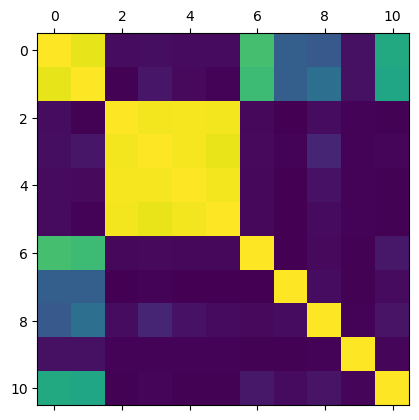

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_numeric.corr())
plt.show()

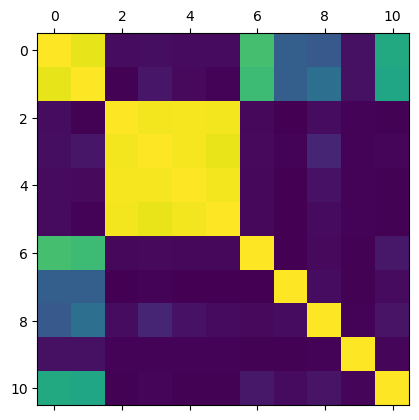

In [16]:
# Save figure
plt.matshow(df_numeric.corr())
plt.savefig("out.png") 

In [17]:
# checking current dir
cwd = os.getcwd()
cwd

'/home/ergo/Desktop/Femina/Analyzing Flight Delays/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

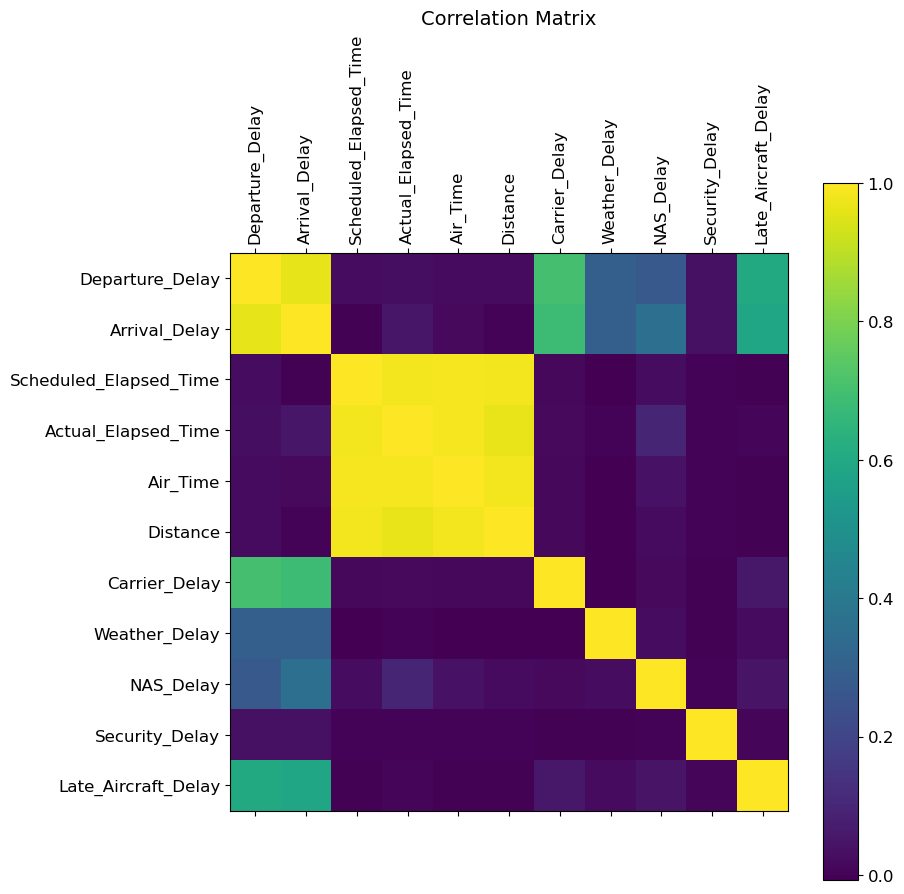

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(df_numeric.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("correlation_matrix.png")

#### Correlation heatmap using seaborn:

In [19]:
df_numeric.columns

Index(['Departure_Delay', 'Arrival_Delay', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'],
      dtype='object')

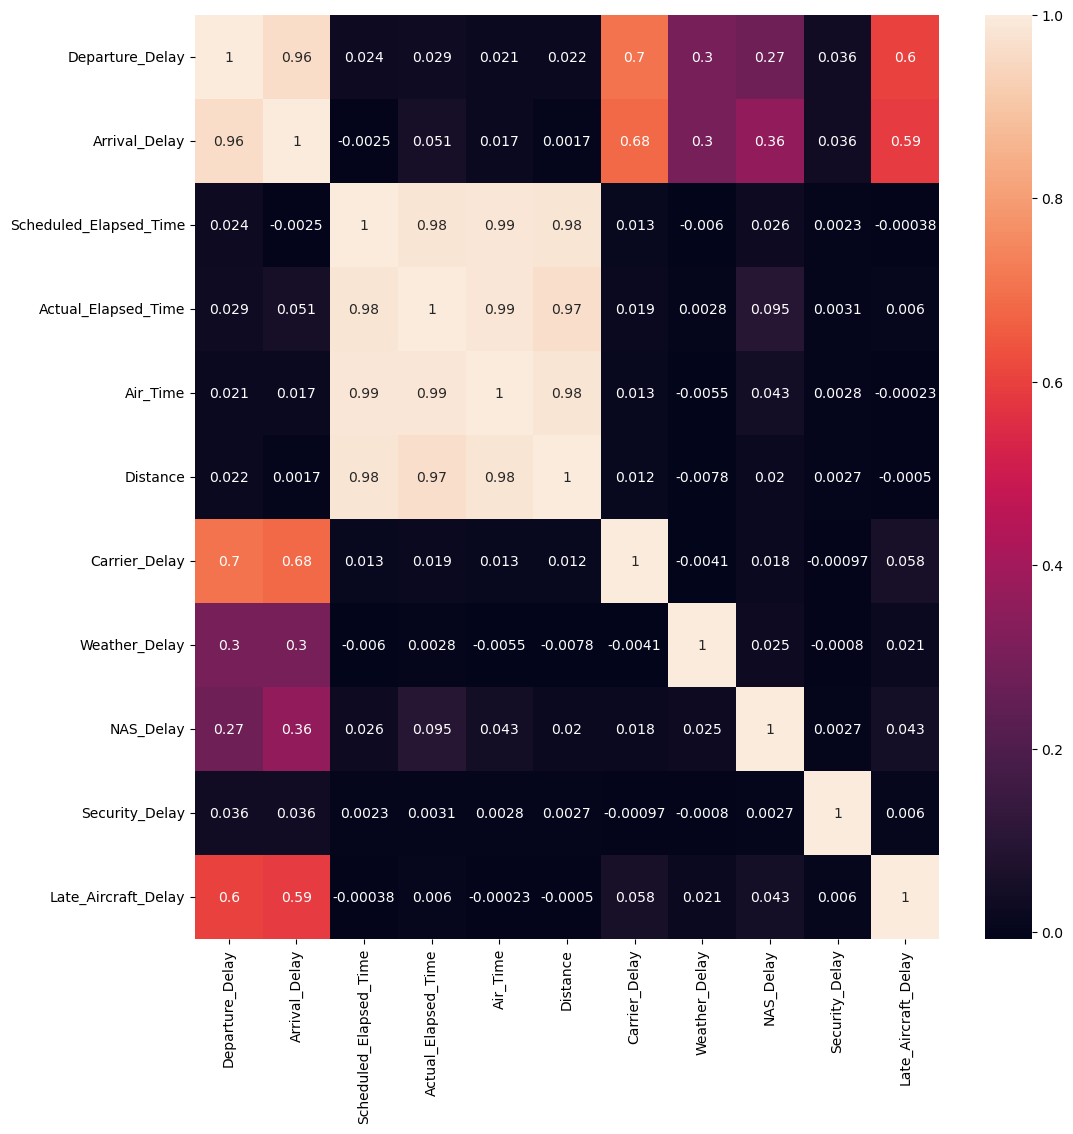

In [20]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplot defined above.

corr = sns.heatmap(df_numeric.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Darker the shade indicates strong negative correlation and lighter the shade indicates strong positive correlation.From the heatmap, we can identify the strongest correlations among the variables are:

Scheduled_Elapsed_Time and Actual_Elapsed_Time: Correlation of approximately 0.99.
Scheduled_Elapsed_Time and Air_Time: Correlation of approximately 0.98.
Actual_Elapsed_Time and Air_Time: Correlation of approximately 0.98.

### Scatterplots:

we will create scatter plots for the following pairs of variables:

1.Scheduled_Elapsed_Time vs. Actual_Elapsed_Time
2.Scheduled_Elapsed_Time vs. Air_Time
3.Actual_Elapsed_Time vs. Air_Time


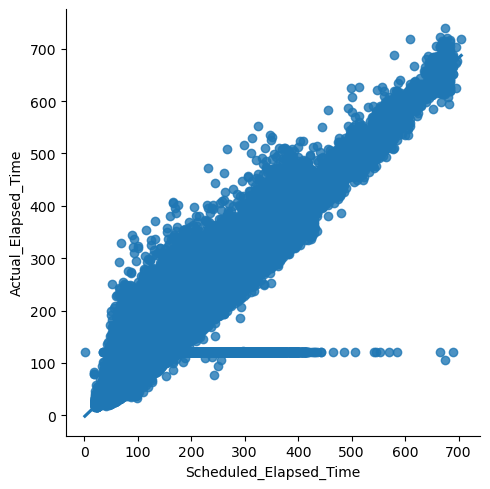

In [21]:
# Create a scatterplot for the "Scheduled_Elapsed_Time" and "Actual_Elapsed_Time" columns in seaborn

sns.lmplot(x = 'Scheduled_Elapsed_Time', y = 'Actual_Elapsed_Time', data = df_numeric)

The plot shows a clear positive correlation, suggesting that flights scheduled to take longer do indeed take longer.The points far from the main cluster may represent outliers or exceptional cases where delays were significantly different from the average trend.There are a number of points with zero delay which are horizontally spread, suggesting that there are many flights which depart and arrive on time. 

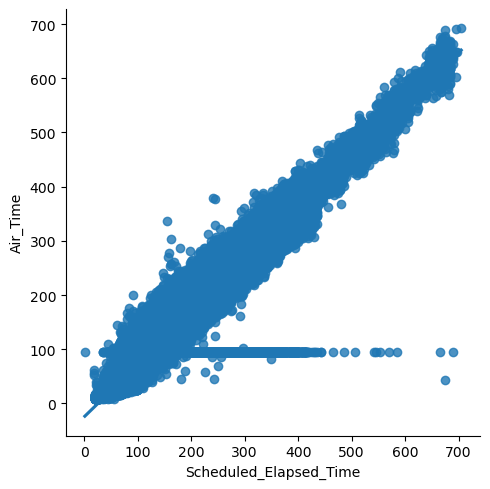

In [22]:
# Create a scatterplot for the "Scheduled_Elapsed_Time" and "Air_Time" columns in seaborn

sns.lmplot(x = 'Scheduled_Elapsed_Time', y = 'Air_Time', data = df_numeric)

The plot demonstrates a clear positive correlation.Longer scheduled elapsed time corresponds to longer air time.

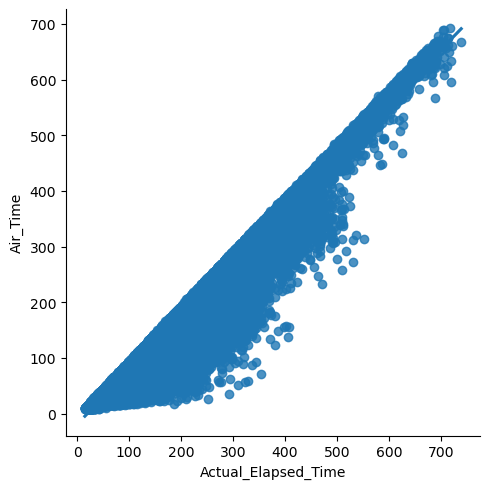

In [23]:
# Create a scatterplot for the "Actual_Elapsed_Time" and "Air_Time" columns in seaborn

sns.lmplot(x = 'Actual_Elapsed_Time', y = 'Air_Time', data = df_numeric)

The strong correlation suggests that variations in Actual Elapsed Time are largely driven by Air Time. However, there is some scatter around the diagonal, indicating variability in the non-air portions of the elapsed time.

### Pair Plots:

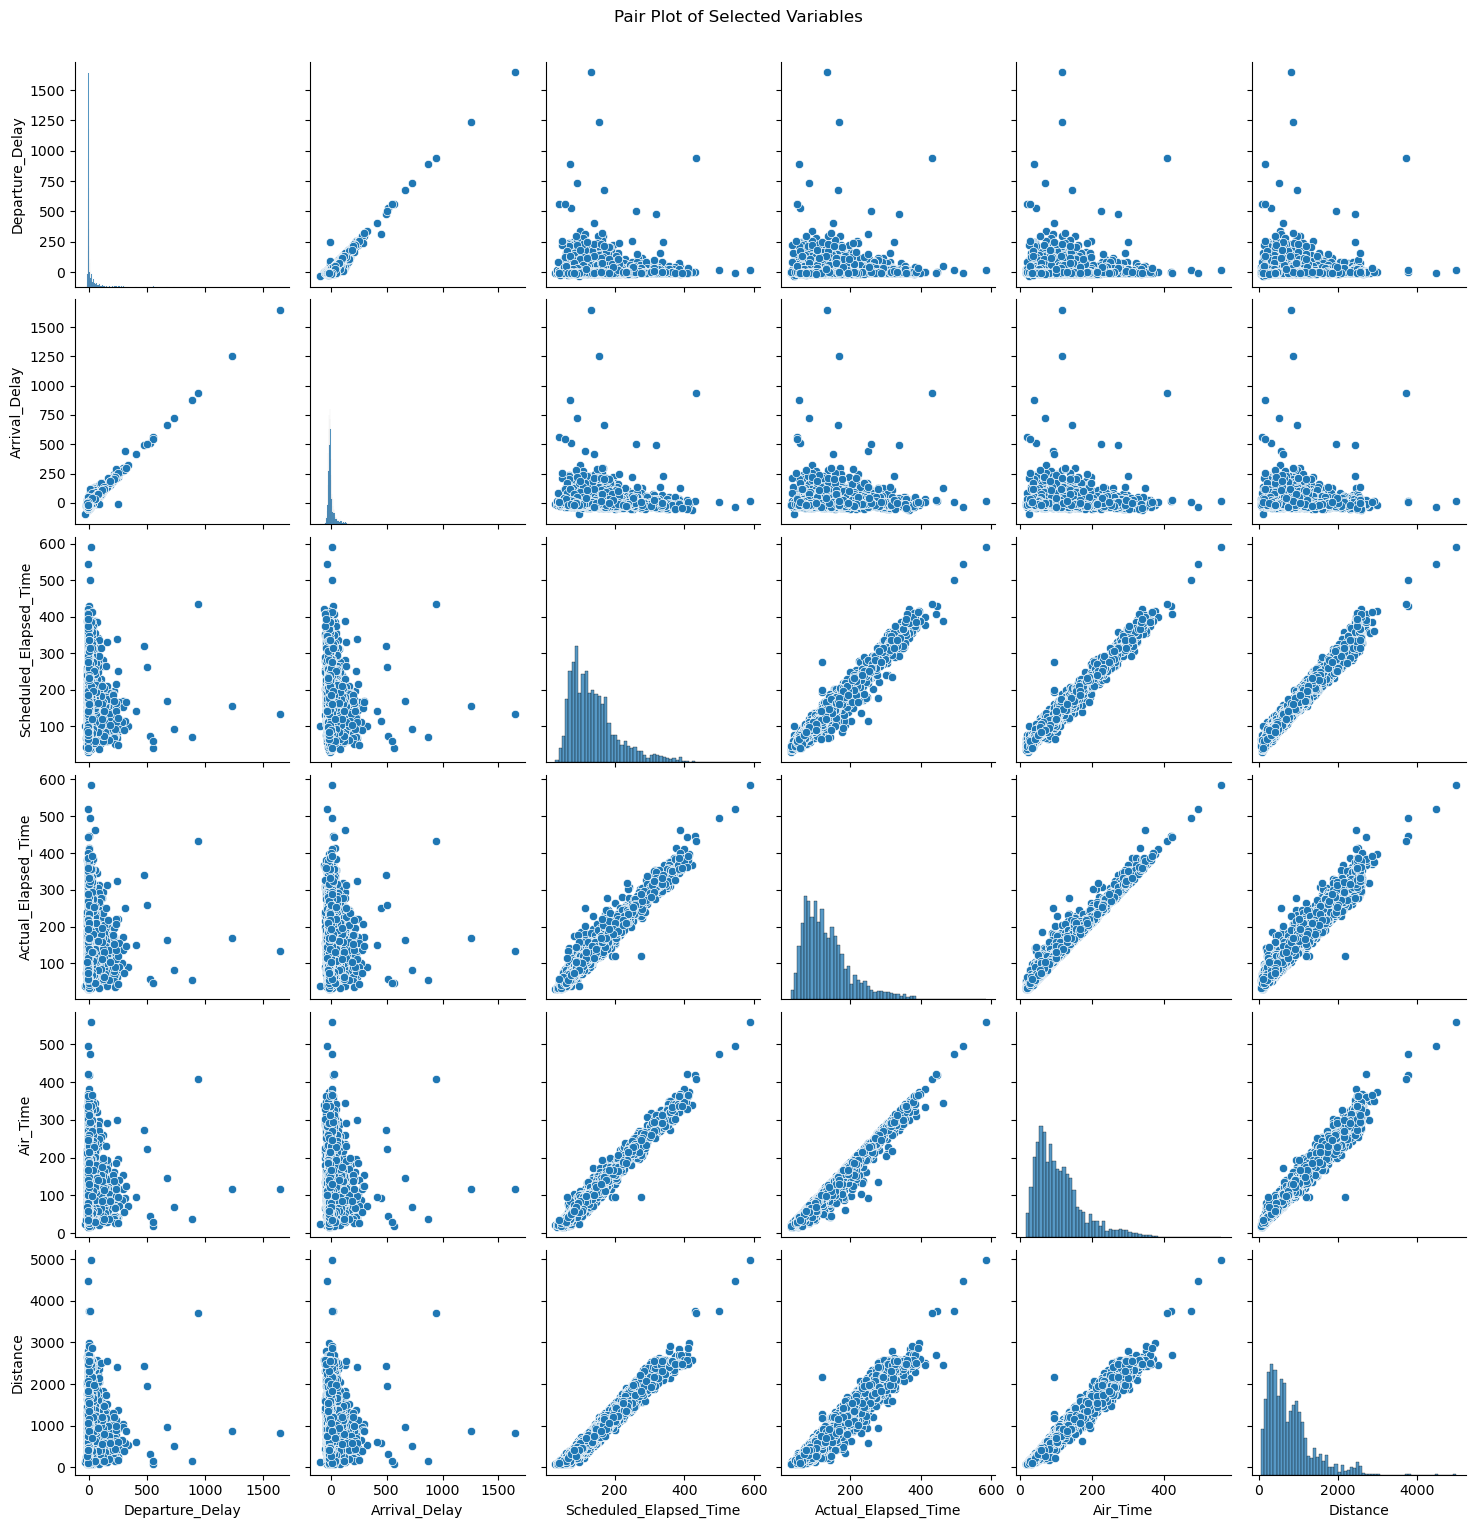

In [24]:
# Take a random sample of 5000 rows since for large dataset its taking long time to run.

# Select relevant columns
selected_columns = [
    'Departure_Delay',
    'Arrival_Delay',
    'Scheduled_Elapsed_Time',
    'Actual_Elapsed_Time',
    'Air_Time',
    'Distance'
]

df_sample = df[selected_columns].sample(n=5000, random_state=42)

# Create a pair plot
sns.pairplot(df_sample)
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

#### Further Analysis

Analyzing outliers to understand potential causes for significant deviations.

### Categorical Plots:

##### Creating a categorical variable that splits the "Departure_Delay" column into categories

<Axes: xlabel='Departure_Delay', ylabel='Count'>

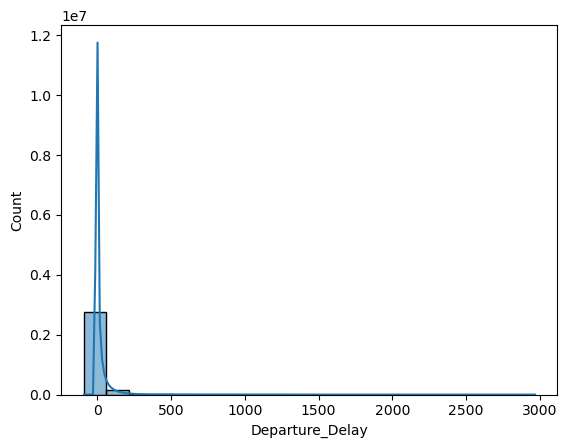

In [25]:
# Use a histogram to visualize the distribution of the variables. 

# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_numeric['Departure_Delay'], bins = 20, kde = True)

In [26]:
df.loc[df['Departure_Delay'] <=0, 'Delay_status'] = 'No delay'

In [27]:
df.loc[(df['Departure_Delay'] >= 1) & (df['Departure_Delay'] <= 30), 'Delay_status'] = 'Short Delay'

In [28]:
df.loc[(df['Departure_Delay'] >= 31) & (df['Departure_Delay'] <= 60), 'Delay_status'] = 'Moderate Delay'

In [29]:
df.loc[df['Departure_Delay'] >60, 'Delay_status'] = 'Long delay'

In [30]:
df['Delay_status'].value_counts(dropna = False)

Delay_status
No delay          1928694
Short Delay        658150
Long delay         177405
Moderate Delay     155809
Name: count, dtype: int64

In [36]:
df.columns

Index(['Unnamed: 0', 'Flight_Date', 'Airline', 'Airline_DOT_Code',
       'Airline_Code', 'Flight_Number', 'Origin_Airport', 'Origin_City',
       'Destination_Airport', 'Destination_City', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay', 'Scheduled_Arrival_Time',
       'Actual_Arrival_Time', 'Arrival_Delay', 'Cancelled',
       'Cancellation_Code', 'Diverted', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay',
       'Delay_status'],
      dtype='object')

In [26]:
df.shape

(2920058, 29)

/home/ergo/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


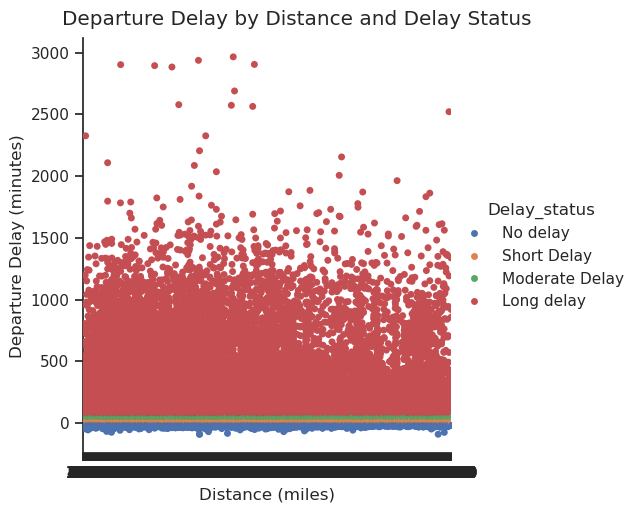

<Figure size 640x480 with 0 Axes>

In [32]:
sns.set(style="ticks")
# Create the categorical plot
g = sns.catplot(x="Distance", y="Departure_Delay", hue="Delay_status", data=df, kind="strip")

# Add titles and labels
g.set_axis_labels("Distance (miles)", "Departure Delay (minutes)")
g.fig.suptitle("Departure Delay by Distance and Delay Status", y=1.02)  # Adjust title position
plt.show()
plt.savefig('Departure_delay.png')

Delays are present at all distances,from short to long hauls, suggesting that distance is not a primary factor in departure delays. The plot shows that other factors may be more significant in contributing to delays rather than the distance of the flight itself.

### 3. Revisit the questions 

Carrier delay and Late Aircraft delays seems to be the primary reason for flight delays.




The correlation coefficient value of 0.3 suggests a moderate relationship between weather delay and flight delay. This implies that as weather delays increase, flight delays also tend to increase, but the relationship is not very strong.

Flights generally follow planned schedules closely, barring any disruptions.

### 4. Hypothesis

1. Flights departing from or arriving at major hub airports experience more delays compared to those at smaller airports.

2. Flights scheduled to depart during peak hours (early morning and late afternoon) experience more delays compared to off-peak hours.